In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline

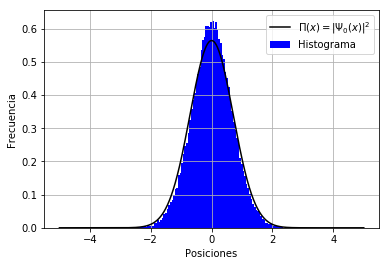

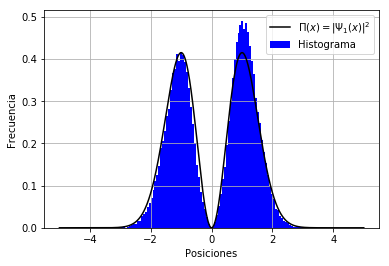

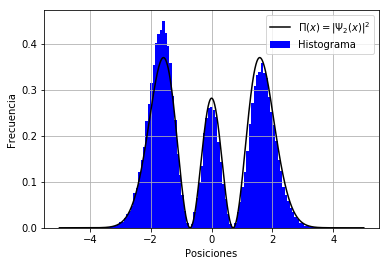

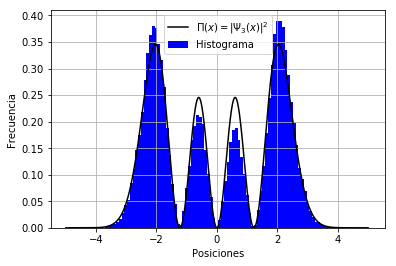

In [3]:
#definición general de las funciones de onda

def WaveFunc(x,n):
    Psi = []
    
    #estado base
    Psi.append ( np.exp(-x**2/2.0) / np.pi** 0.25 )
    
    #primer estado excitado
    Psi.append ( np.sqrt(2.0) * x * Psi[0] ) 
    
    #estados excitados (recursión):
    for m in range (2, n+2):
        Psi.append(np.sqrt(2/m) * x * Psi[m-1] - np.sqrt((m-1)/m) * Psi[m-2])
    return (Psi[n])

#transición de x a x' independiente de n, para 4 niveles de energía

n_states = 4
xiter= 100000
x = 0.0
delta = 0.5

n_bins = 100

xs = np.arange(-5.0, 5.0, 0.0001)

beta = 1.0

for n in range(n_states):
    x_sample = []
    
    for k in range(xiter):
        x_new  = x + random.uniform(-delta,delta)
        
        Px     = WaveFunc(x, n)
        Px_new = WaveFunc(x_new, n)
        
        if random.uniform(0.0,1.0) < min(1, (Px_new/Px)**2):
            x = x_new
            x_sample.append(x)
 
    
    #graficas para cada n
    plt.figure(n)
    plt.hist(x_sample, bins=n_bins, normed=True, histtype='bar', lw=2, color="blue",label="Histograma")
    plt.plot(xs, WaveFunc(xs,n)**2, color = "k", label = r"$\Pi(x) = |\Psi_{%i}(x)|^2$" %n)
    plt.xlabel(r"Posiciones")
    plt.ylabel(r"Frecuencia")
    plt.grid()
    plt.legend()
    plt.savefig("curvan%i.png"%n)
    plt.show

<function matplotlib.pyplot.show>

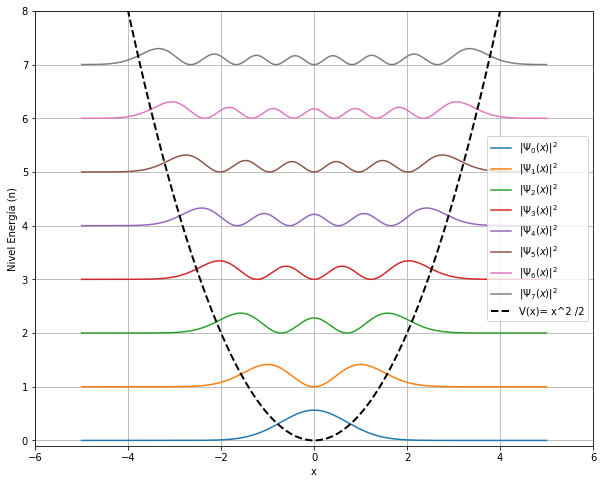

In [4]:
# probabilidad teórica \pi_{n}(x) para 10 niveles de energía

n_states = 8

xs = np.arange(-5.0, 5.0, 0.001)

#for n in range(n_states):
#superposición graficas para cada n
plt.figure(figsize=(10,8))
for n in range(n_states):
    plt.plot(xs, n+WaveFunc(xs,n)**2, label = r"$|\Psi_{%i}(x)|^2$" %n)
    #plt.plot(xs, n+WaveFunc(xs,n)**2)
    
plt.plot(xs,xs**2/2, "k--", lw=2, label=r"V(x)= x^2 /2")    
#plt.twinx()
plt.xlabel(r"x")
plt.ylabel(r"Nivel Energía (n)")
plt.ylim(-0.1,8)
plt.xlim(-6,6)
plt.grid()
plt.legend()
plt.savefig("modulo_funciones_onda.png")
plt.show

In [5]:

#definición de probabilidades exactas

def quantum_probability(x,b):
    Pi_quantum  = np.sqrt(np.tanh(b/2.0)/np.pi)*np.exp(-(x**2)*(np.tanh(b/2.0)))
    return Pi_quantum
                                                          
def classic_probability(x,b):
    Pi_classic = np.sqrt(b/(2*np.pi))*np.exp(-(b*(x**2))/2.0)
    return Pi_classic                                                     
                                                        

$\beta = 0.00$


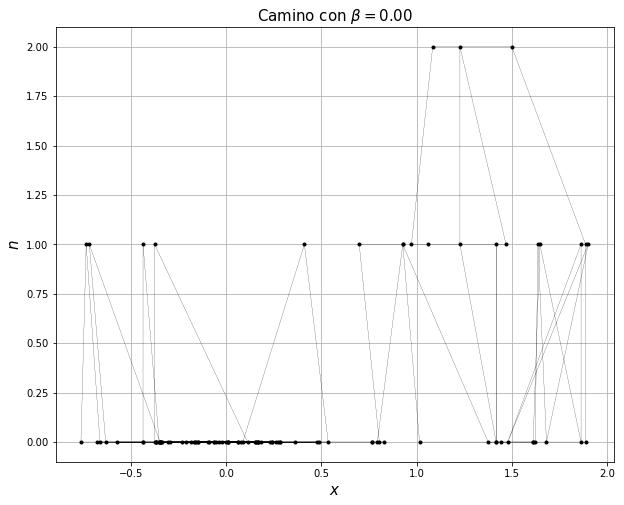

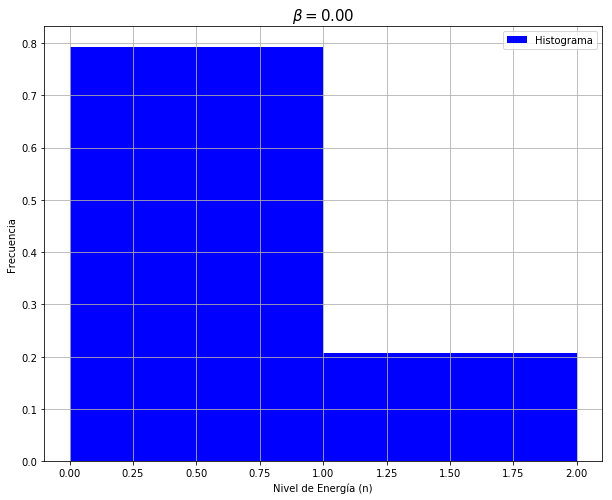

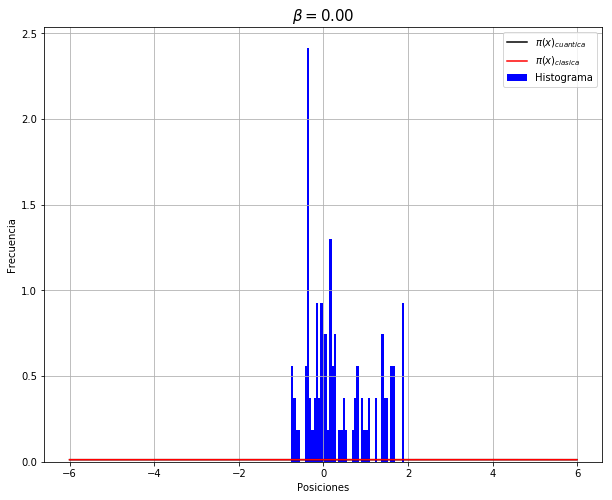

$\beta = 0.20$


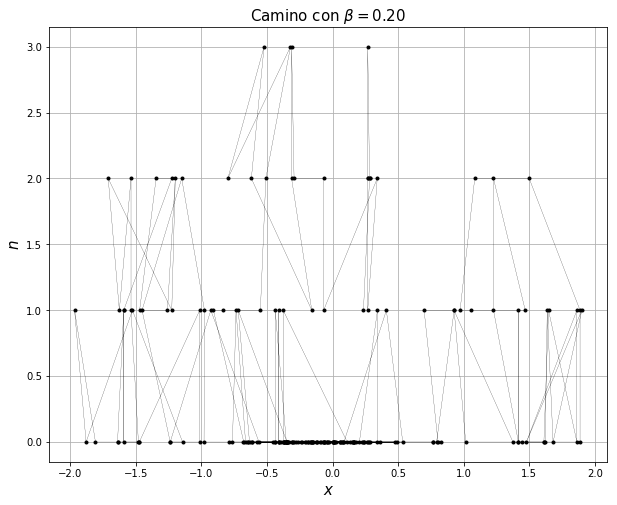

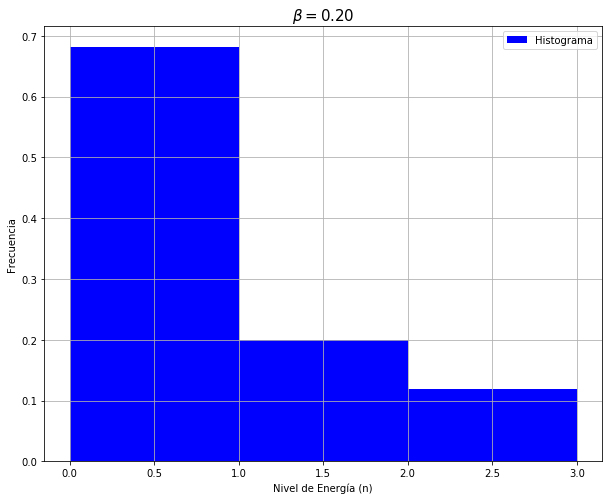

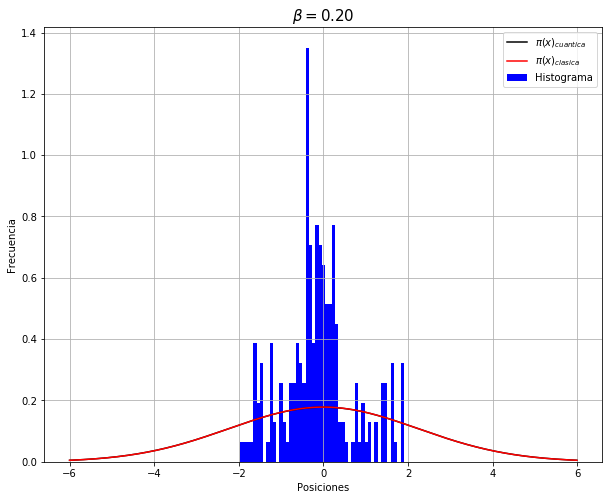

$\beta = 1.00$


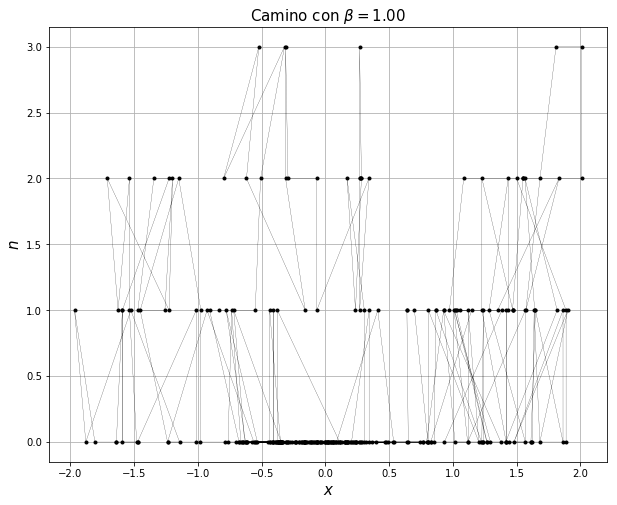

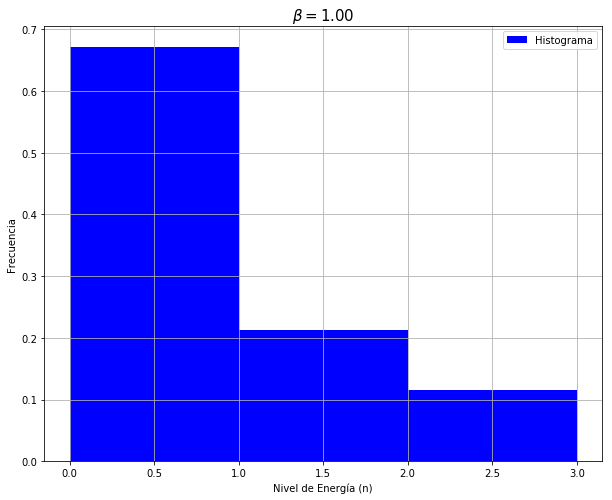

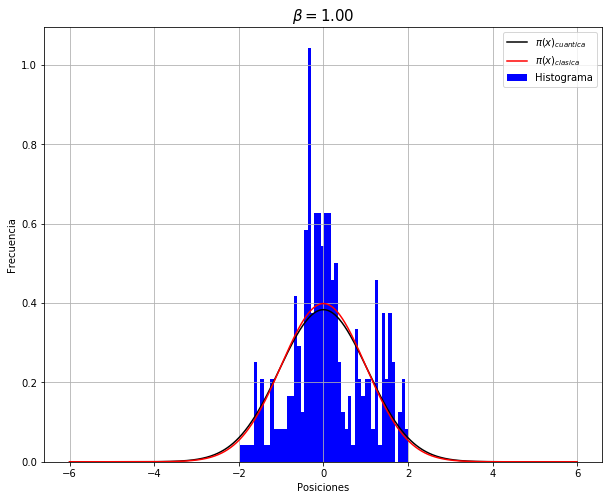

$\beta = 5.00$


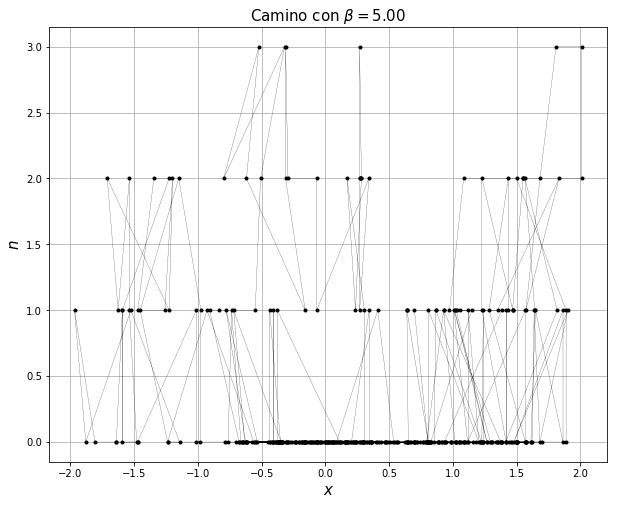

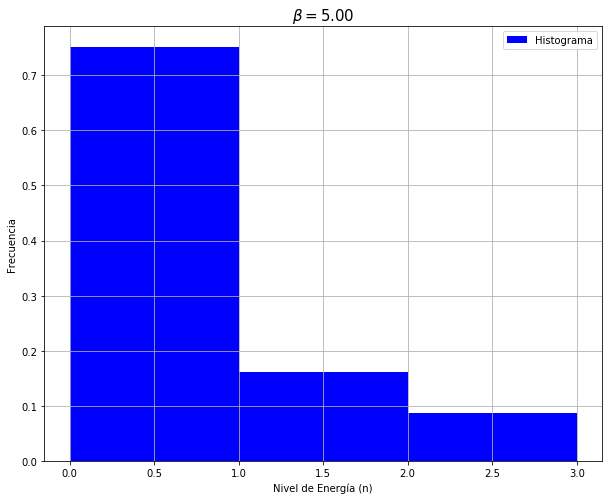

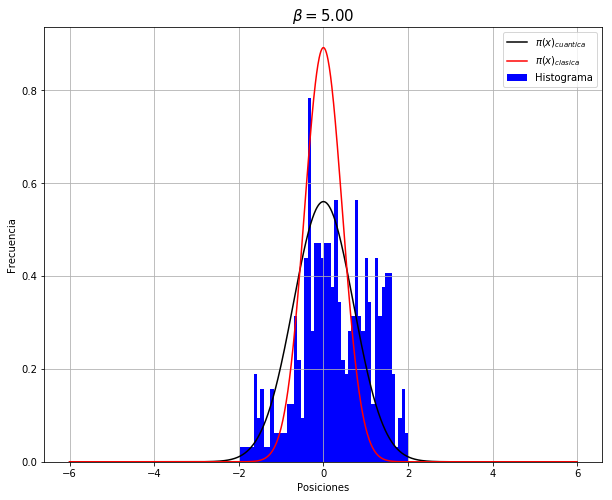

$\beta = 20.00$


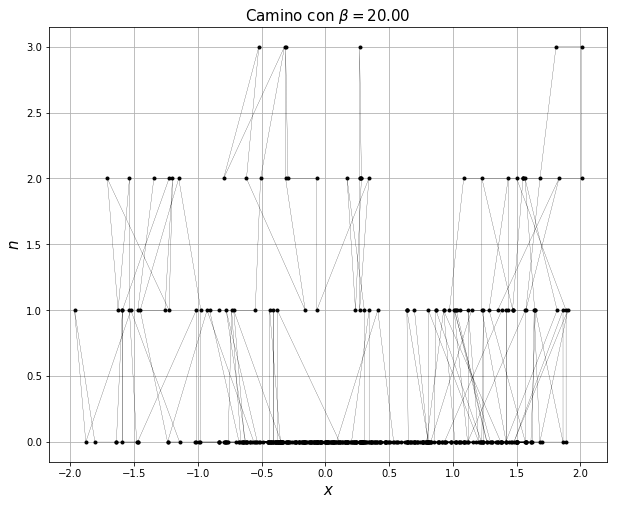

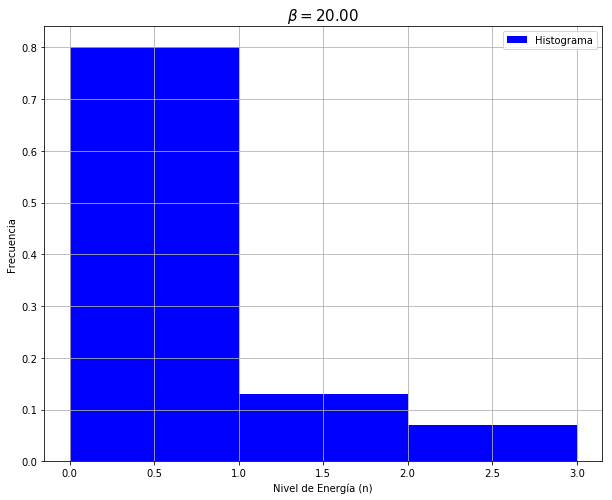

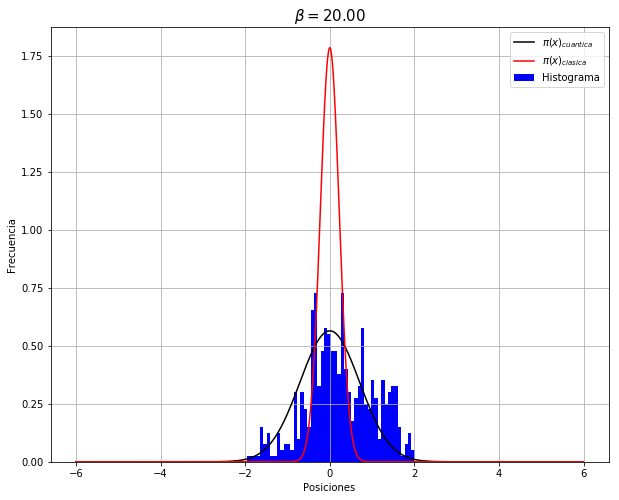

In [ ]:
#transición de x a x'

def jump_x(x,n):
    x_new  = x + random.uniform(-delta,delta)
    Phix     = WaveFunc(x, n)
    Phix_new = WaveFunc(x_new, n)
    if random.uniform(0.0,1.0) < min(1, (Phix_new/Phix)**2):
        return x_new
    else:
        return x

# probabilidad de que estando en x, transite de n a m
    
def jump_n(x,n,beta):
    deltaE = np.random.choice([-1,1])
    n_new = n + deltaE
    
    if n_new < 0:     #no considere niveles negativos
        return n
    
    #la probabilidad de transición a un estado de menor energía es 1:
    if deltaE < 0:     
        return n_new
    
    #si es un nivel energético mayor se evalua el criterio de aceptación
    Phin = WaveFunc(x, n)
    Phin_new = WaveFunc(x,n_new)
    
    if random.uniform(0.0,1.0) < min(1, ((Phin_new/Phin)**2)*np.exp(-beta*(deltaE))):
        return n_new
    else:
        return n

xs_points = np.arange(-6, 6, 0.01)


#Estado incial
x = 0.0
n = 0

Beta = [0.001,0.2,1,5,20]

Xs = [x]
Ns = [n]

n_bins = 50

k_iter = 100

for b in Beta:
    print(r"$\beta = %0.2f$"%b)
    for k in range(k_iter):
        
        #evaluar posibilidad de transición x a x'
        x = jump_x(x,n) 
        
        #sea que se quedó en x o que transitó a x', evaluar posibilidad de transición energética n a m 
        n = jump_n(x,n,b)
        
        Xs.append(x)
        Ns.append(n)
    
    #grafica del camino aleatorio
    plt.figure(figsize=(10,8))
    plt.plot(Xs,Ns,"k.-",linewidth=0.2)
    plt.title(r"Camino con $\beta=%0.2f$"%b,fontsize = 15)
    plt.xlabel(r"$x$",fontsize = 15)
    plt.ylabel(r"$n$",fontsize = 15)
    plt.grid()
    plt.savefig("camino_b_%0.2f.png"%b)
    plt.show()
    plt.clf()
    
    #histograma energías
    plt.figure(figsize=(10,8))
    plt.hist(Ns, bins=(max(Ns)), normed=True, histtype='bar', lw=2, color="blue",label="Histograma")
    plt.title(r"$\beta=%0.2f$"%b,fontsize = 15)
    #plt.xticks(range(12))
    #plt.xlim([0,11])
    plt.xlabel(r"Nivel de Energía (n)")
    plt.ylabel(r"Frecuencia")
    plt.grid()
    plt.legend()
    plt.savefig("histo_energia_%0.2f.png"%b)
    plt.show()
    
    exit(0)
    
    #para graficar las funciones exactas:
    
    y_quantum = quantum_probability(xs_points,b)
                                                          
    y_classic = classic_probability(xs_points,b)

    plt.figure(figsize=(10,8))
    #histograma posiciones
    plt.hist(Xs, bins=n_bins, normed=True, histtype='bar', lw=2, color="blue",label="Histograma")
    #funciones teóricas
    plt.plot(xs_points, y_quantum, color = "k", label = r"$\pi(x)_{cuantica}$")
    plt.plot(xs_points,y_classic, color = "r", label = r"$\pi(x)_{clasica}$")
    plt.title(r"$\beta=%0.2f$"%b,fontsize = 15)
    plt.xlabel(r"Posiciones")
    plt.ylabel(r"Frecuencia")
    plt.grid()
    plt.legend()
    plt.savefig("curva_b%0.2f.png"%b)
    plt.show()

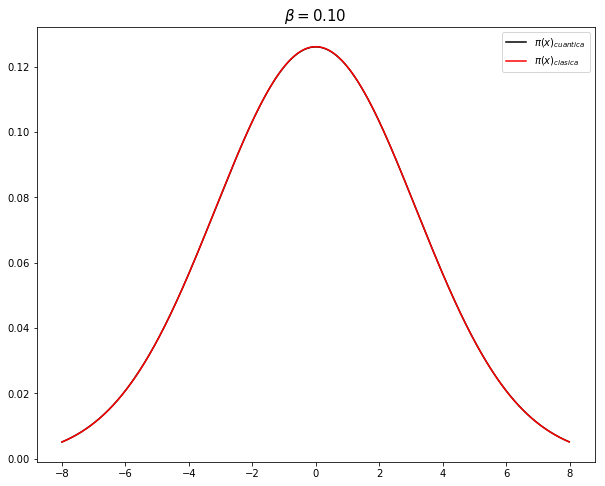

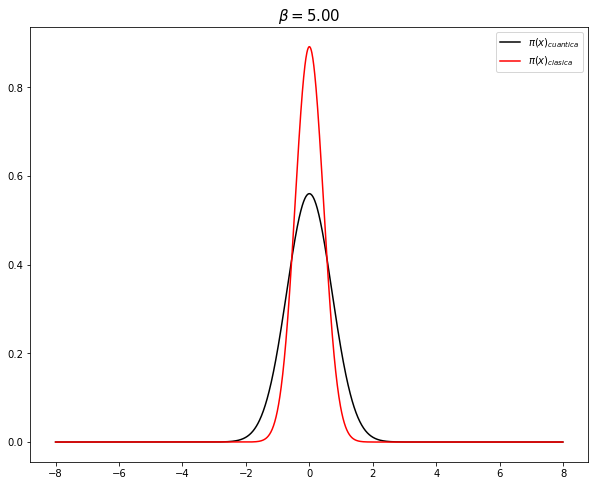

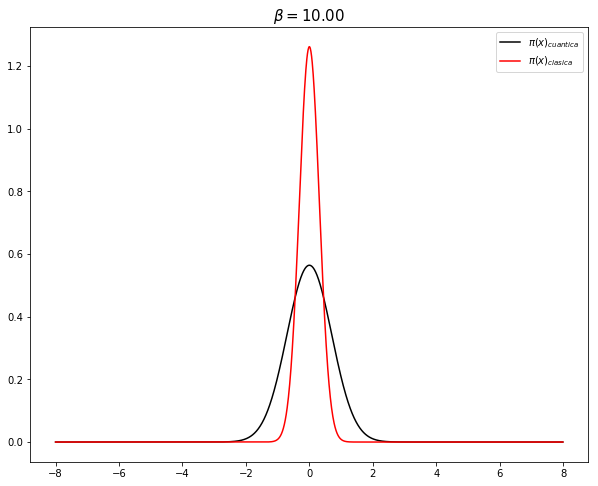

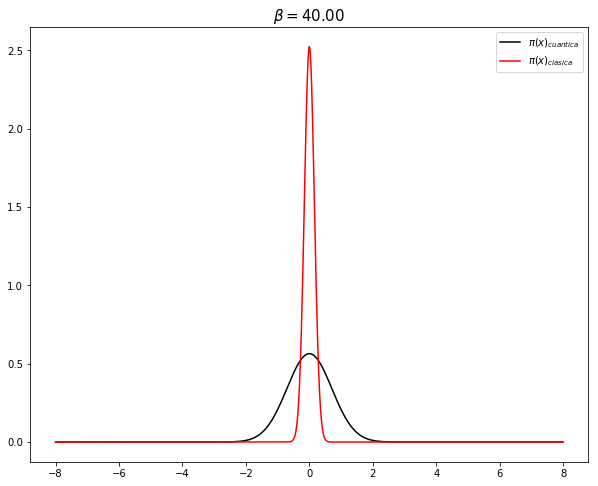

In [46]:
betta = [0.1,5,10,40]

xs_points = np.arange(-8, 8, 0.01)

for i in betta:
    
    y_quantum = quantum_probability(xs_points,i)
                                                          
    y_classic = classic_probability(xs_points,i)

    plt.figure(figsize=(10,8))
    #funciones teóricas
    plt.plot(xs_points, y_quantum, color = "k", label = r"$\pi(x)_{cuantica}$")
    plt.plot(xs_points,y_classic, color = "r", label = r"$\pi(x)_{clasica}$")
    plt.title(r"$\beta=%0.2f$"%i,fontsize = 15)
    plt.legend()